# Handling Missing Values

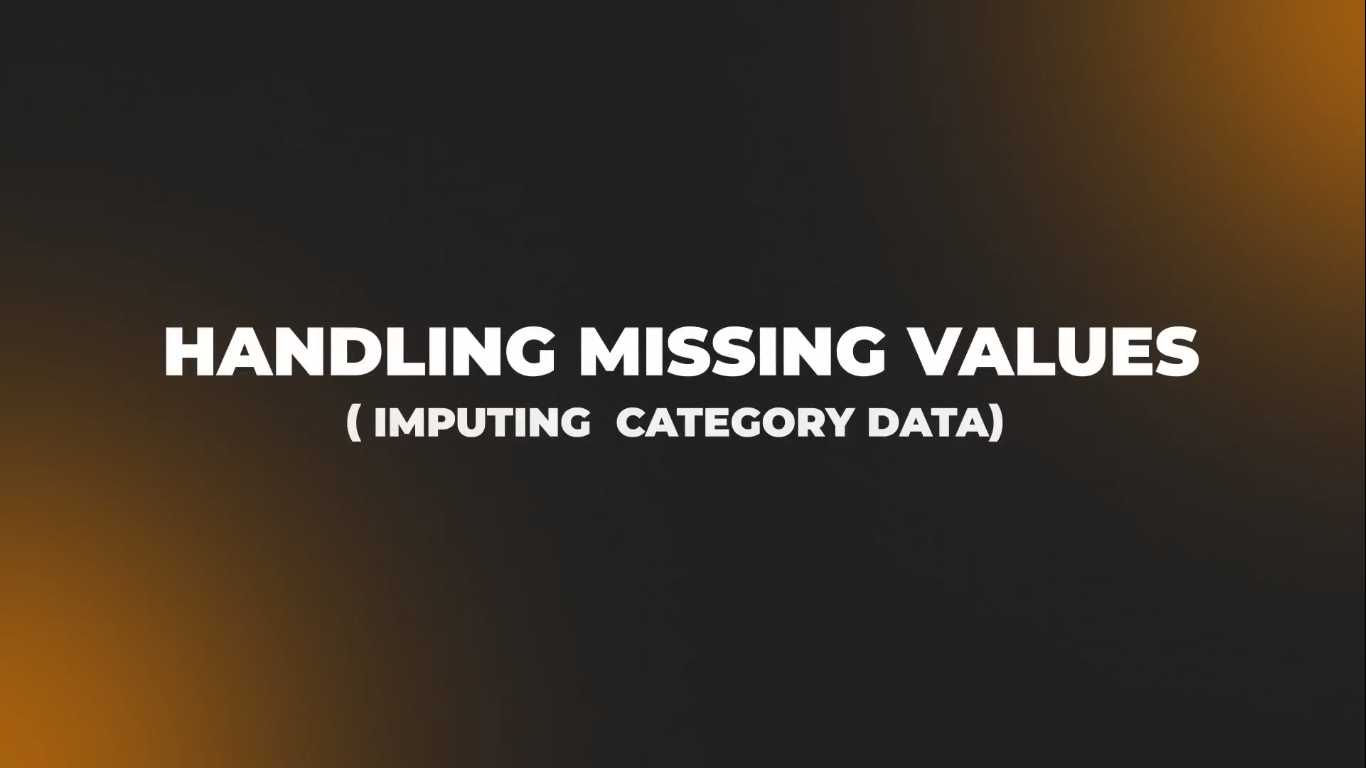

In [45]:
from IPython.display import Image, display
display(Image(filename=r"H:\Programming\Files\Machine Learning\photos\C_04.png"))

In [4]:
import pandas as pd 

In [6]:
df = pd.read_csv(r"H:\Programming\Files\Machine Learning\Files\Loan Dataset.csv")
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [8]:
def check(self):
    print("\nCheck Shape:")
    print(self.shape)
    print("\nCheck Info:")
    print(self.info())
    print("\nCheck NaN Values:")
    print(self.isnull().sum())
    print("\nNaN in Percentage:")
    print((((self.isnull().sum().sum())/len(self))*100).round(2))
    print("\nCheck Duplicates:")
    print(self.duplicated().sum())

check(df)



Check Shape:
(614, 13)

Check Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

Check NaN Values:
Loan_ID               0
Gender               13
Mar

In [10]:
# Check Mode
df['Gender'].mode()[0]

'Male'

In [12]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [24]:
for i in df.columns:
    print( df[i].mode())
    

0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object
0    Male
Name: Gender, dtype: object
0    Yes
Name: Married, dtype: object
0    0
Name: Dependents, dtype: object
0    Graduate
Name: Education, dtype: object
0    No
Name: Self_Employed, dtype: object
0    2500
Name: ApplicantIncome, dtype: int64
0    0.0
Name: CoapplicantIncome, dtype: float64
0    120.0
Name: LoanAmount, dtype: float64
0    360.0
Name: Loan_Amount_Term, dtype: float64
0    1.0
Name: Credit_History, dtype: float64
0    Semiurban
Name: Property_Area, dtype: object
0    Y
Name: Loan_Status, dtype: object


In [20]:
for col in df.columns:
    print(f"Mode of {col}:\n{df[col].mode()}\n")


Mode of Loan_ID:
0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object

Mode of Gender:
0    Male
Name: Gender, dtype: object

Mode of Married:
0    Yes
Name: Married, dtype: object

Mode of Dependents:
0    0
Name: Dependents, dtype: object

Mode of Education:
0    Graduate
Name: Education, dtype: object

Mode of Self_Employed:
0    No
Name: Self_Employed, dtype: object

Mode of ApplicantIncome:
0    2500
Name: ApplicantIncome, dtype: int64

Mode of CoapplicantIncome:
0    0.0
Name: CoapplicantIncome, dtype: float64

Mode of LoanAmount:
0    120.0
Name: LoanAmount, dtype: float64

Mode of Loan_Amount_Term:
0    360.0
Name: Loan_Amount_Term, dtype: float64

Mode of Credit_History:
0    1.0
Name: Credit_History, dtype: float64

Mode of Property_Area:
0    Semiurban
Name: Property_Area, dtype: object

Mode of Loan_Status:
0   

# Fill NaN Data

In [29]:
# Select data types
df_obj = df.select_dtypes(include='object')
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Loan_ID        614 non-null    object
 1   Gender         601 non-null    object
 2   Married        611 non-null    object
 3   Dependents     599 non-null    object
 4   Education      614 non-null    object
 5   Self_Employed  582 non-null    object
 6   Property_Area  614 non-null    object
 7   Loan_Status    614 non-null    object
dtypes: object(8)
memory usage: 38.5+ KB


In [33]:
# Column name 
df_obj_col = df_obj.columns
df_obj_col

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [41]:
# Fill NaN values by Mode
for i in df_obj_col:
    df_obj[i].fillna(df_obj[i].mode()[0],inplace=True)

df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Loan_ID        614 non-null    object
 1   Gender         614 non-null    object
 2   Married        614 non-null    object
 3   Dependents     614 non-null    object
 4   Education      614 non-null    object
 5   Self_Employed  614 non-null    object
 6   Property_Area  614 non-null    object
 7   Loan_Status    614 non-null    object
dtypes: object(8)
memory usage: 38.5+ KB


In [43]:
df_obj.isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64